In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import linear_model
from sklearn.kernel_approximation import Nystroem

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering

from sklearn.preprocessing import StandardScaler

## Method Testing

In [3]:
sales = pd.read_csv('sales_mod.csv')

/tmp/ipykernel_2354714/1754691465.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('sales_mod.csv')


In [4]:
sales.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
sales.set_index('sale_key', inplace=True)

In [6]:
sales.columns

Index(['township_code', 'class', 'pin', 'year', 'sale_date', 'sale_price',
       'sale_price_log10', 'doc_no', 'deed_type', 'seller_name',
       'is_multisale', 'num_parcels_sale', 'buyer_name', 'sale_type',
       'sale_filter_lower_limit', 'sale_filter_upper_limit',
       'sale_filter_count', 'property_advertised',
       'is_installment_contract_fulfilled',
       'is_sale_between_related_individuals_or_corporate_affiliates',
       'is_transfer_of_less_than_100_percent_interest',
       'is_court_ordered_sale', 'is_sale_in_lieu_of_foreclosure',
       'is_condemnation', 'is_short_sale', 'is_bank_reo_real_estate_owned',
       'is_auction_sale', 'is_seller_buyer_a_relocation_company',
       'is_seller_buyer_a_financial_institution_or_government_agency',
       'is_buyer_a_real_estate_investment_trust', 'is_buyer_a_pension_fund',
       'is_buyer_an_adjacent_property_owner',
       'is_buyer_exercising_an_option_to_purchase',
       'is_simultaneous_trade_of_property', 'is_sale_l

In [7]:
feed_data = sales[['sale_price_log10zscore',
       'price_per_sqft_log10zscore', 'pctzscore', 'countszscore',
       'days_since_last_transactionzscore']]

In [8]:
feed_data.fillna(0, inplace=True)

/tmp/ipykernel_2354714/719415807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feed_data.fillna(0, inplace=True)


In [9]:
feeder_train, X_test = train_test_split(feed_data, test_size=0.85, random_state=42)

In [10]:
#scaler = StandardScaler()
#feeder_train_scaled = scaler.fit_transform(feed_data)

#feeder_train = pd.DataFrame(feeder_train_scaled, columns=feeder_train.columns)

## Isolation Forest

## Logical Outlier Factor

In [11]:
# -1 is outlier and 1 is normal
# Looking at human readable CSV, this looks to be about similar to (1,2) in terms of outlier detections just from raw numbers.
#for val in [5,10,15,20,25,30,35,40,45,50]:
#    lof = LocalOutlierFactor(n_neighbors = val)
#    prediction = lof.fit_predict(feeder_train)
#    print(f'{val} nearest neighbors:', np.unique(prediction, return_counts=True))


In [12]:
# Random Forest feature importance

## SVM

In [13]:
feature_map_nystroem = Nystroem(random_state=1,
                                n_components=300)
data_transformed = feature_map_nystroem.fit_transform(feeder_train)

In [14]:
for val in [.25,.5,.75]:
    svm = linear_model.SGDOneClassSVM(nu=val)
    prediction = svm.fit_predict(data_transformed)
    print(f'nu is {val}', np.unique(prediction, return_counts=True))

nu is 0.25 (array([-1,  1], dtype=int32), array([ 8217, 24503]))
nu is 0.5 (array([-1,  1], dtype=int32), array([16329, 16391]))
nu is 0.75 (array([-1,  1], dtype=int32), array([24478,  8242]))


## PCA

In [15]:
pca = PCA(n_components = len(feeder_train.columns))
pca.fit(feed_data)

PCA(n_components=5)

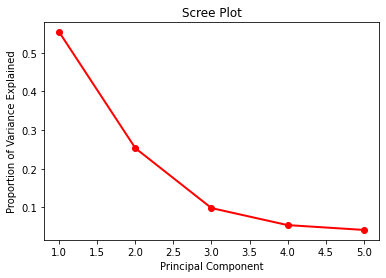

In [53]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [17]:
pc = pca.fit_transform(feed_data)

In [18]:
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [19]:
pc_df

,PC1,PC2,PC3,PC4,PC5
0,-0.706755,0.277962,0.019436,0.019062,-0.000126
1,-0.046266,-0.268234,-0.003005,0.001875,0.004977
2,1.153853,0.101036,-0.023447,-0.032336,-0.009451
3,0.893624,0.526858,-0.011460,-0.026026,-0.015128
4,-0.162694,0.328888,0.008430,0.003808,-0.004640
...,...,...,...,...,...
218134,1.070961,0.224942,-0.019804,-0.030301,-0.011056
218135,-2.031549,-0.429486,0.037525,0.057485,0.021020
218136,0.511770,-0.787510,-0.022828,-0.012519,0.010296
218137,-0.071608,1.576731,0.025094,-0.001461,-0.026968


In [20]:
feeder = pc_df[['PC1','PC2']]
feeder.index = sales.index
feeder['township'] = sales.township_code
feeder['class'] = sales['class']

/tmp/ipykernel_2354714/2595673313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feeder['township'] = sales.township_code
/tmp/ipykernel_2354714/2595673313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feeder['class'] = sales['class']


In [21]:
results = feeder.copy()

In [22]:
real_outs = feeder.copy()
real_outs.index = sales.index

In [23]:
real_outs['primary_outlier'] = sales['primary_outlier']

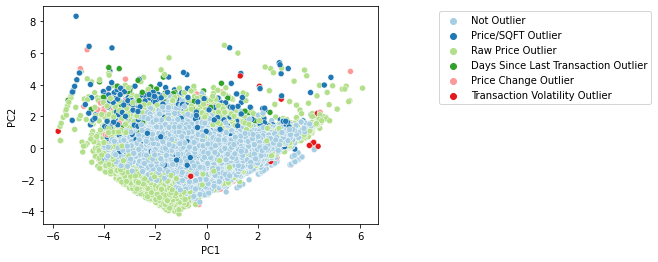

In [24]:
sns.scatterplot(x="PC1", y="PC2", hue=real_outs.primary_outlier.to_list(),
                palette=sns.color_palette("Paired")[:real_outs.primary_outlier.nunique()],
                data=real_outs)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1))

In [25]:
real_outs.primary_outlier.value_counts()

Not Outlier                            195986
Raw Price Outlier                       10971
Price/SQFT Outlier                       4276
Days Since Last Transaction Outlier      3451
Price Change Outlier                     2611
Transaction Volatility Outlier            844
Name: primary_outlier, dtype: int64

In [26]:
real_outs_not = real_outs[real_outs.primary_outlier == 'Not Outlier']

In [27]:
real_outs_actual = real_outs[real_outs.primary_outlier != 'Not Outlier']

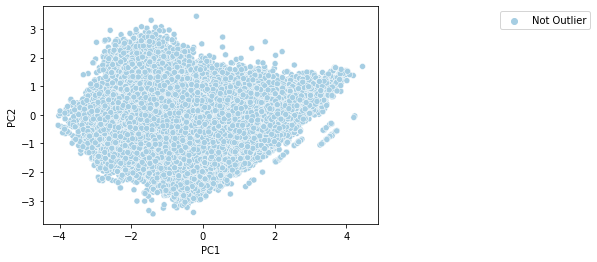

In [28]:
sns.scatterplot(x="PC1", y="PC2", hue=real_outs_not.primary_outlier.to_list(),
                palette=sns.color_palette("Paired")[:real_outs_not.primary_outlier.nunique()],
                data=real_outs_not)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1))

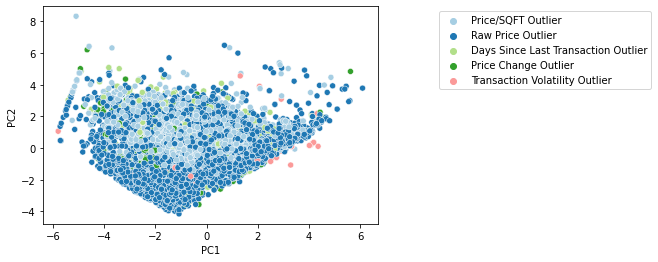

In [29]:
sns.scatterplot(x="PC1", y="PC2", hue=real_outs_actual.primary_outlier.to_list(),
                palette=sns.color_palette("Paired")[:real_outs_actual.primary_outlier.nunique()],
                data=real_outs_actual)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1))

In [30]:
isof = IsolationForest(n_estimators=1500, max_samples=20000, bootstrap=True, random_state=42, warm_start=True)
results['isof'] = isof.fit_predict(feeder)

In [31]:
results.isof.value_counts()

 1    194093
-1     24046
Name: isof, dtype: int64

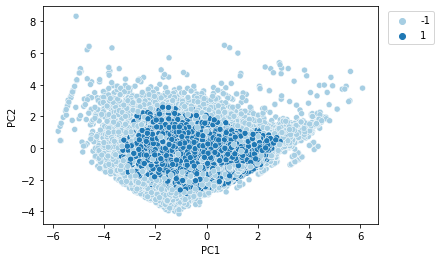

In [32]:
sns.scatterplot(x="PC1", y="PC2", hue=results.isof.to_list(),
                palette=sns.color_palette("Paired")[:results.isof.nunique()],
                data=results)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))

In [33]:
real_outs['isof'] = results['isof']

In [34]:
real_outs

,PC1,PC2,township,class,primary_outlier,isof
sale_key,,,,,,
96812985.0,-0.706755,0.277962,29,295,Not Outlier,1
98075139.0,-0.046266,-0.268234,72,205,Not Outlier,1
97373057.0,1.153853,0.101036,24,206,Not Outlier,1
7321053.0,0.893624,0.526858,27,203,Not Outlier,1
96592558.0,-0.162694,0.328888,24,203,Not Outlier,1
...,...,...,...,...,...,...
98482344.0,1.070961,0.224942,38,295,Not Outlier,-1
7209461.0,-2.031549,-0.429486,72,202,Not Outlier,1
7249327.0,0.511770,-0.787510,35,278,Raw Price Outlier,1


In [35]:
real_outs[real_outs.isof == 1].groupby('primary_outlier')['isof'].sum()

primary_outlier
Days Since Last Transaction Outlier      2752
Not Outlier                            180002
Price Change Outlier                     2347
Price/SQFT Outlier                       2502
Raw Price Outlier                        5948
Transaction Volatility Outlier            542
Name: isof, dtype: int64

In [36]:
abs(real_outs[real_outs.isof == -1].groupby('primary_outlier')['isof'].sum())

primary_outlier
Days Since Last Transaction Outlier      699
Not Outlier                            15984
Price Change Outlier                     264
Price/SQFT Outlier                      1774
Raw Price Outlier                       5023
Transaction Volatility Outlier           302
Name: isof, dtype: int64

In [47]:
isof_outs = real_outs[real_outs.isof == -1]

In [51]:
len(isof_outs[isof_outs.primary_outlier != 'Not Outlier']) / len(isof_outs)

0.33527405805539384

About 33% of the outliers that isolation forest identified are records we also identified as outliers with our methodology.

In [49]:
isof_ins = real_outs[real_outs.isof == 1]

In [50]:
len(isof_ins[isof_ins.primary_outlier == 'Not Outlier']) / len(isof_ins)

0.9274007820993029

About 92% of the records that the isolation forest model identified as non-outliers were also non-outliers according to our methodology.

In [39]:
only_outs = results[results.isof == -1]

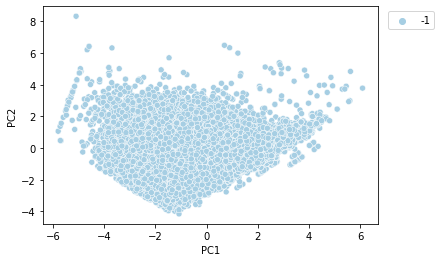

In [40]:
sns.scatterplot(x="PC1", y="PC2", hue=only_outs.isof.to_list(),
                palette=sns.color_palette("Paired")[:only_outs.isof.nunique()],
                data=only_outs)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))

In [41]:
only_nots = results[results.isof == 1]

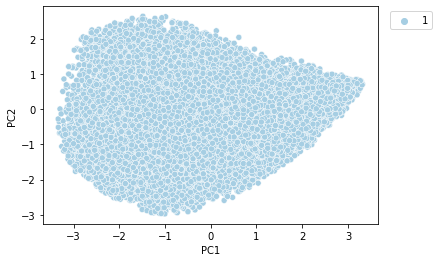

In [42]:
sns.scatterplot(x="PC1", y="PC2", hue=only_nots.isof.to_list(),
                palette=sns.color_palette("Paired")[:only_nots.isof.nunique()],
                data=only_nots)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))